# Bernstein-Vazirani algorithm

## The problem that this algorithm aims to solve 
Suppose there is a function $f(x)$, n-digits variable, $x$, and an n-digits constant, $a$ which satisfies the following equation.

<img src="https://latex.codecogs.com/gif.latex?f(x)&space;=&space;x&space;\bullet&space;a&space;\equiv&space;(x_0&space;\bullet&space;a_0&space;)&space;\oplus&space;(x_1&space;\bullet&space;a_1&space;)&space;\cdot\cdot\cdot&space;\oplus&space;(x_{n-1}&space;\bullet&space;a_{n-1&space;})" title="f(x) = x \bullet a \equiv (x_0 \bullet a_0 ) \oplus (x_1 \bullet a_1 ) \cdot\cdot\cdot \oplus (x_{n-1} \bullet a_{n-1 })" />  

This algorithm can be used to figure out $a$ in just one evaluation, while its classical counterpart takes $n$ time evaluations.

1st time:  <img src="https://latex.codecogs.com/gif.latex?f(0\cdot&space;\cdot&space;\cdot&space;1)&space;=&space;1\bullet&space;a_0&space;=&space;a_0" title="f(0\cdot \cdot \cdot 1) = 1\bullet a_0 = a_0" />  
・  
・  
・  
nth time:  <img src="https://latex.codecogs.com/gif.latex?f(1\cdot&space;\cdot&space;\cdot&space;0)&space;=&space;1\bullet&space;a_{n-1}&space;=&space;a_{n-1}" title="f(1\cdot \cdot \cdot 0) = 1\bullet a_{n-1} = a_{n-1}" /> 


## Mathematical explanation    
A hadamard gate is something which perform the following computation.  
<img src="https://latex.codecogs.com/gif.latex?|x\rangle&space;\xrightarrow{H}&space;\frac{1}{\sqrt{2^n}}\sum_{y=0}^{2^n-1}&space;(-1)^{x\cdot&space;y}|y\rangle" title="|x\rangle \xrightarrow{H} \frac{1}{\sqrt{2^n}}\sum_{y=0}^{2^n-1} (-1)^{x\cdot y}|y\rangle" />  

This is the process to get $a$. [Learn More: J.Du & R.Han (2000)(https://arxiv.org/abs/quant-ph/0012114)] 
<img src="https://latex.codecogs.com/gif.latex?(|0\rangle)^{n}|1\rangle&space;\xrightarrow{H(n&plus;1)}\frac{1}{\sqrt{2^n}}&space;\sum_{x=0}^{2^n-1}&space;|x\rangle&space;\otimes&space;\frac{|0\rangle-|1\rangle}{\sqrt{2}}" title="(|0\rangle)^{n}|1\rangle \xrightarrow{H(n+1)}\frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle \otimes \frac{|0\rangle-|1\rangle}{\sqrt{2}}" />  
<img src="https://latex.codecogs.com/gif.latex?\xrightarrow{U_f}&space;\frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1}&space;(-1)^{s\cdot&space;x}|x\rangle&space;\otimes&space;\frac{|0\rangle&space;-&space;|1\rangle}{\sqrt{2}}" title="\xrightarrow{U_f} \frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1} (-1)^{s\cdot x}|x\rangle \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}" />  
<img src="https://latex.codecogs.com/gif.latex?\xrightarrow{H^{(n)}}&space;\frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1}\sum_{y=0}^{2^n-1}&space;(-1)^{s\cdot&space;x&space;&plus;&space;x\cdot&space;y}|y\rangle&space;\otimes&space;\frac{|0\rangle&space;-&space;|1\rangle}{\sqrt{2}}" title="\xrightarrow{H^{(n)}} \frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1}\sum_{y=0}^{2^n-1} (-1)^{s\cdot x + x\cdot y}|y\rangle \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}" />  
<img src="https://latex.codecogs.com/gif.latex?\equiv&space;|s\rangle&space;\otimes&space;\frac{|0\rangle&space;-|1\rangle}{\sqrt{2}}&space;\xrightarrow{H_n}&space;|s\rangle&space;\otimes&space;|1\rangle" title="\equiv |s\rangle \otimes \frac{|0\rangle -|1\rangle}{\sqrt{2}} \xrightarrow{H_n} |s\rangle \otimes |1\rangle" />(If $y = s$)  

## High Level Algorithm
- We start with   qubits all in the $ | 0 \rangle $ state.
- We then Hadamard them all.
- Next we query $f$ (using the ‘phase’ type of query)

## Implementation in qiskit  
As an example, I am going to implement the case to get $|111\rangle$.


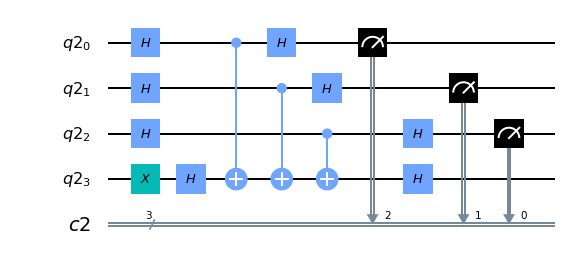

In [14]:
from qiskit import *
from qiskit.visualization import *

# Suppose a(the number we want to obtain) = 111
# This is the oracle
def bv_oracle(qci,n):
    for i in range(n):
        qci.cx(q[i],q[n])
        
#The number of qubits    
bn = 4
#The number of classical bits
cn = 3

q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q,c)

#Flip the last qubit
qc.x(q[3])

#Put hadamard transform on all the qubits
for i in range(bn):
    qc.h(q[i])
    
#Put the oracle
bv_oracle(qc,3)

#Put Put hadamard transform again
for i in range(bn):
    qc.h(q[i])
    
for j in range(cn):
    qc.measure(q[cn-j-1],c[j])
    
qc.draw("mpl")

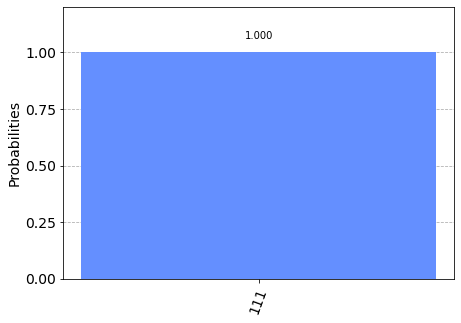

In [15]:
backend = 'qasm_simulator'

backend_sim = Aer.get_backend(backends[1])
result = execute(qc, backend_sim, shots=1024).result()

plot_histogram(result.get_counts(qc))

## Result

As expected, we get $|111\rangle$ $100\%$ of the times through simulation.  

And Here is the result on a real device.  
![screen shot 2019-01-07 at 5 47 18 pm](https://user-images.githubusercontent.com/45162150/50758053-67fbc300-12a4-11e9-8117-7497c9ec6684.png)  

## Reference  
J Du and R Han(2001), *Implementation of a quantum algorithm to solve the Bernstein-Vazirani parity problem without entanglement on an ensemble quantum computer*, Phys. Rev. A 64, 042306

## Alternative Learning Resource
- [qiskit-youtube-link](https://www.youtube.com/watch?v=sqJIpHYl7oo&vl=en-US)

- A chapter on Bernstein Vazirani (also in the zip file)
![seminar_chapter](bpdf.pdf)
